In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Training_data=pd.read_csv("train.csv")
Training_data.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [3]:
Test_data=pd.read_csv("test.csv")
Test_data.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40
1,1,0.34109,0.0,7.38,0,0.493,6.415,40.1,4.7211,5,287.0,19.6,396.90,6.12
2,2,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666.0,20.2,24.65,15.69
3,3,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45
4,4,1.80028,0.0,19.58,0,0.605,5.877,79.2,2.4259,5,403.0,14.7,227.61,12.14


In [4]:
Input=Training_data.drop(['MEDV'],axis=1)
Out=Training_data['MEDV']
Out

0      14.8
1      25.0
2      41.3
3      18.4
4      19.8
       ... 
395    27.9
396    24.7
397    19.5
398    20.4
399    22.5
Name: MEDV, Length: 400, dtype: float64

In [5]:
Y=pd.DataFrame(Out,columns=['MEDV'])

In [6]:
Y.head()

,MEDV
0,14.8
1,25.0
2,41.3
3,18.4
4,19.8


In [7]:
#replacing 0s with null values:
Training_data.ZN.replace(0,np.nan,inplace=True)
Training_data.CHAS.replace(0,np.nan,inplace=True)
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       104 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     29 non-null     float64
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 47.0 KB


In [8]:
Training_data.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.95577,NaN,8.14,NaN,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,1,0.02875,28.0,15.04,NaN,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,2,1.22358,NaN,19.58,NaN,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,3,5.66637,NaN,18.10,NaN,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,4,0.04544,NaN,3.24,NaN,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8


In [9]:
#Calculating percentage of null values
Training_data.isnull().sum()/len(Test_data)*100

ID           0.000000
CRIM         0.000000
ZN         281.904762
INDUS        0.000000
CHAS       353.333333
NOX          0.000000
RM           0.000000
AGE          0.000000
DIS          0.000000
RAD          0.000000
TAX          0.000000
PTRATIO      0.000000
B            0.000000
LSTAT        0.000000
MEDV         0.000000
dtype: float64

In [10]:
Training_data=Training_data.drop(['ZN',"CHAS"],axis=1)

In [11]:
#now we have all non-null data
Training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   INDUS    400 non-null    float64
 3   NOX      400 non-null    float64
 4   RM       400 non-null    float64
 5   AGE      400 non-null    float64
 6   DIS      400 non-null    float64
 7   RAD      400 non-null    int64  
 8   TAX      400 non-null    float64
 9   PTRATIO  400 non-null    float64
 10  B        400 non-null    float64
 11  LSTAT    400 non-null    float64
 12  MEDV     400 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 40.8 KB


[]

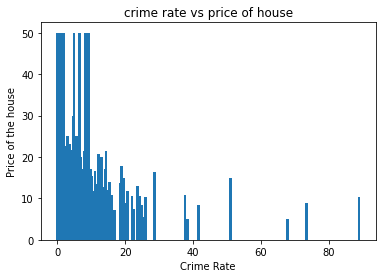

In [12]:
#plotting 
plt.bar(Training_data.CRIM,Training_data.MEDV)
plt.xlabel("Crime Rate")
plt.ylabel('Price of the house')
plt.title('crime rate vs price of house')
plt.plot()


[]

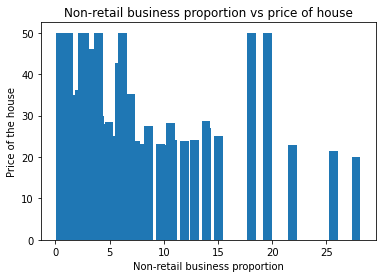

In [13]:
plt.bar(Training_data.INDUS,Training_data.MEDV)
plt.xlabel("Non-retail business proportion")
plt.ylabel('Price of the house')
plt.title('Non-retail business proportion vs price of house')
plt.plot()



[]

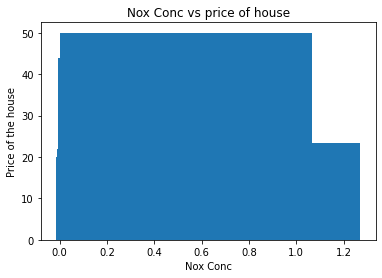

In [14]:
plt.bar(Training_data.NOX,Training_data.MEDV)
plt.xlabel("Nox Conc")
plt.ylabel('Price of the house')
plt.title('Nox Conc vs price of house')
plt.plot()




[]

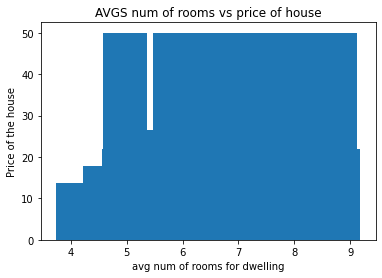

In [15]:
plt.bar(Training_data.RM,Training_data.MEDV)
plt.xlabel("avg num of rooms for dwelling")
plt.ylabel('Price of the house')
plt.title('AVGS num of rooms vs price of house')
plt.plot()




[]

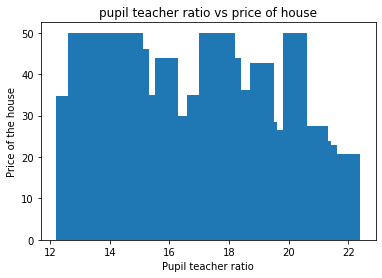

In [16]:
plt.bar(Training_data.PTRATIO,Training_data.MEDV)
plt.xlabel("Pupil teacher ratio")
plt.ylabel('Price of the house')
plt.title('pupil teacher ratio vs price of house')
plt.plot()




[]

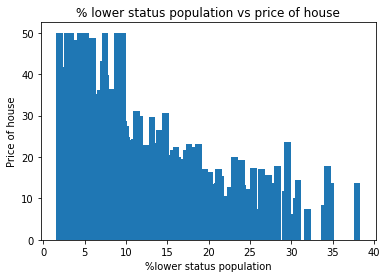

In [17]:
plt.bar(Training_data.LSTAT,Training_data.MEDV)
plt.xlabel('%lower status population')
plt.ylabel('Price of house')
plt.title('% lower status population vs price of house')
plt.plot()

In [18]:
Training_data.describe()

,ID,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,3.757191,10.936425,0.552817,6.292165,68.086000,3.819462,9.462500,403.797500,18.459000,359.455375,12.668525,22.475750
std,115.614301,9.155496,6.848042,0.115488,0.709923,28.386888,2.132445,8.687478,169.656816,2.148105,86.732906,7.207047,9.218611
min,0.000000,0.009060,0.460000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.920000,5.000000
25%,99.750000,0.077820,5.130000,0.449000,5.877500,42.375000,2.109150,4.000000,277.000000,17.400000,376.115000,6.990000,17.100000
50%,199.500000,0.242170,8.560000,0.532000,6.208500,76.950000,3.272100,5.000000,329.000000,18.950000,391.575000,10.875000,21.000000
75%,299.250000,3.543428,18.100000,0.624000,6.620500,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.910000,25.000000
max,399.000000,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


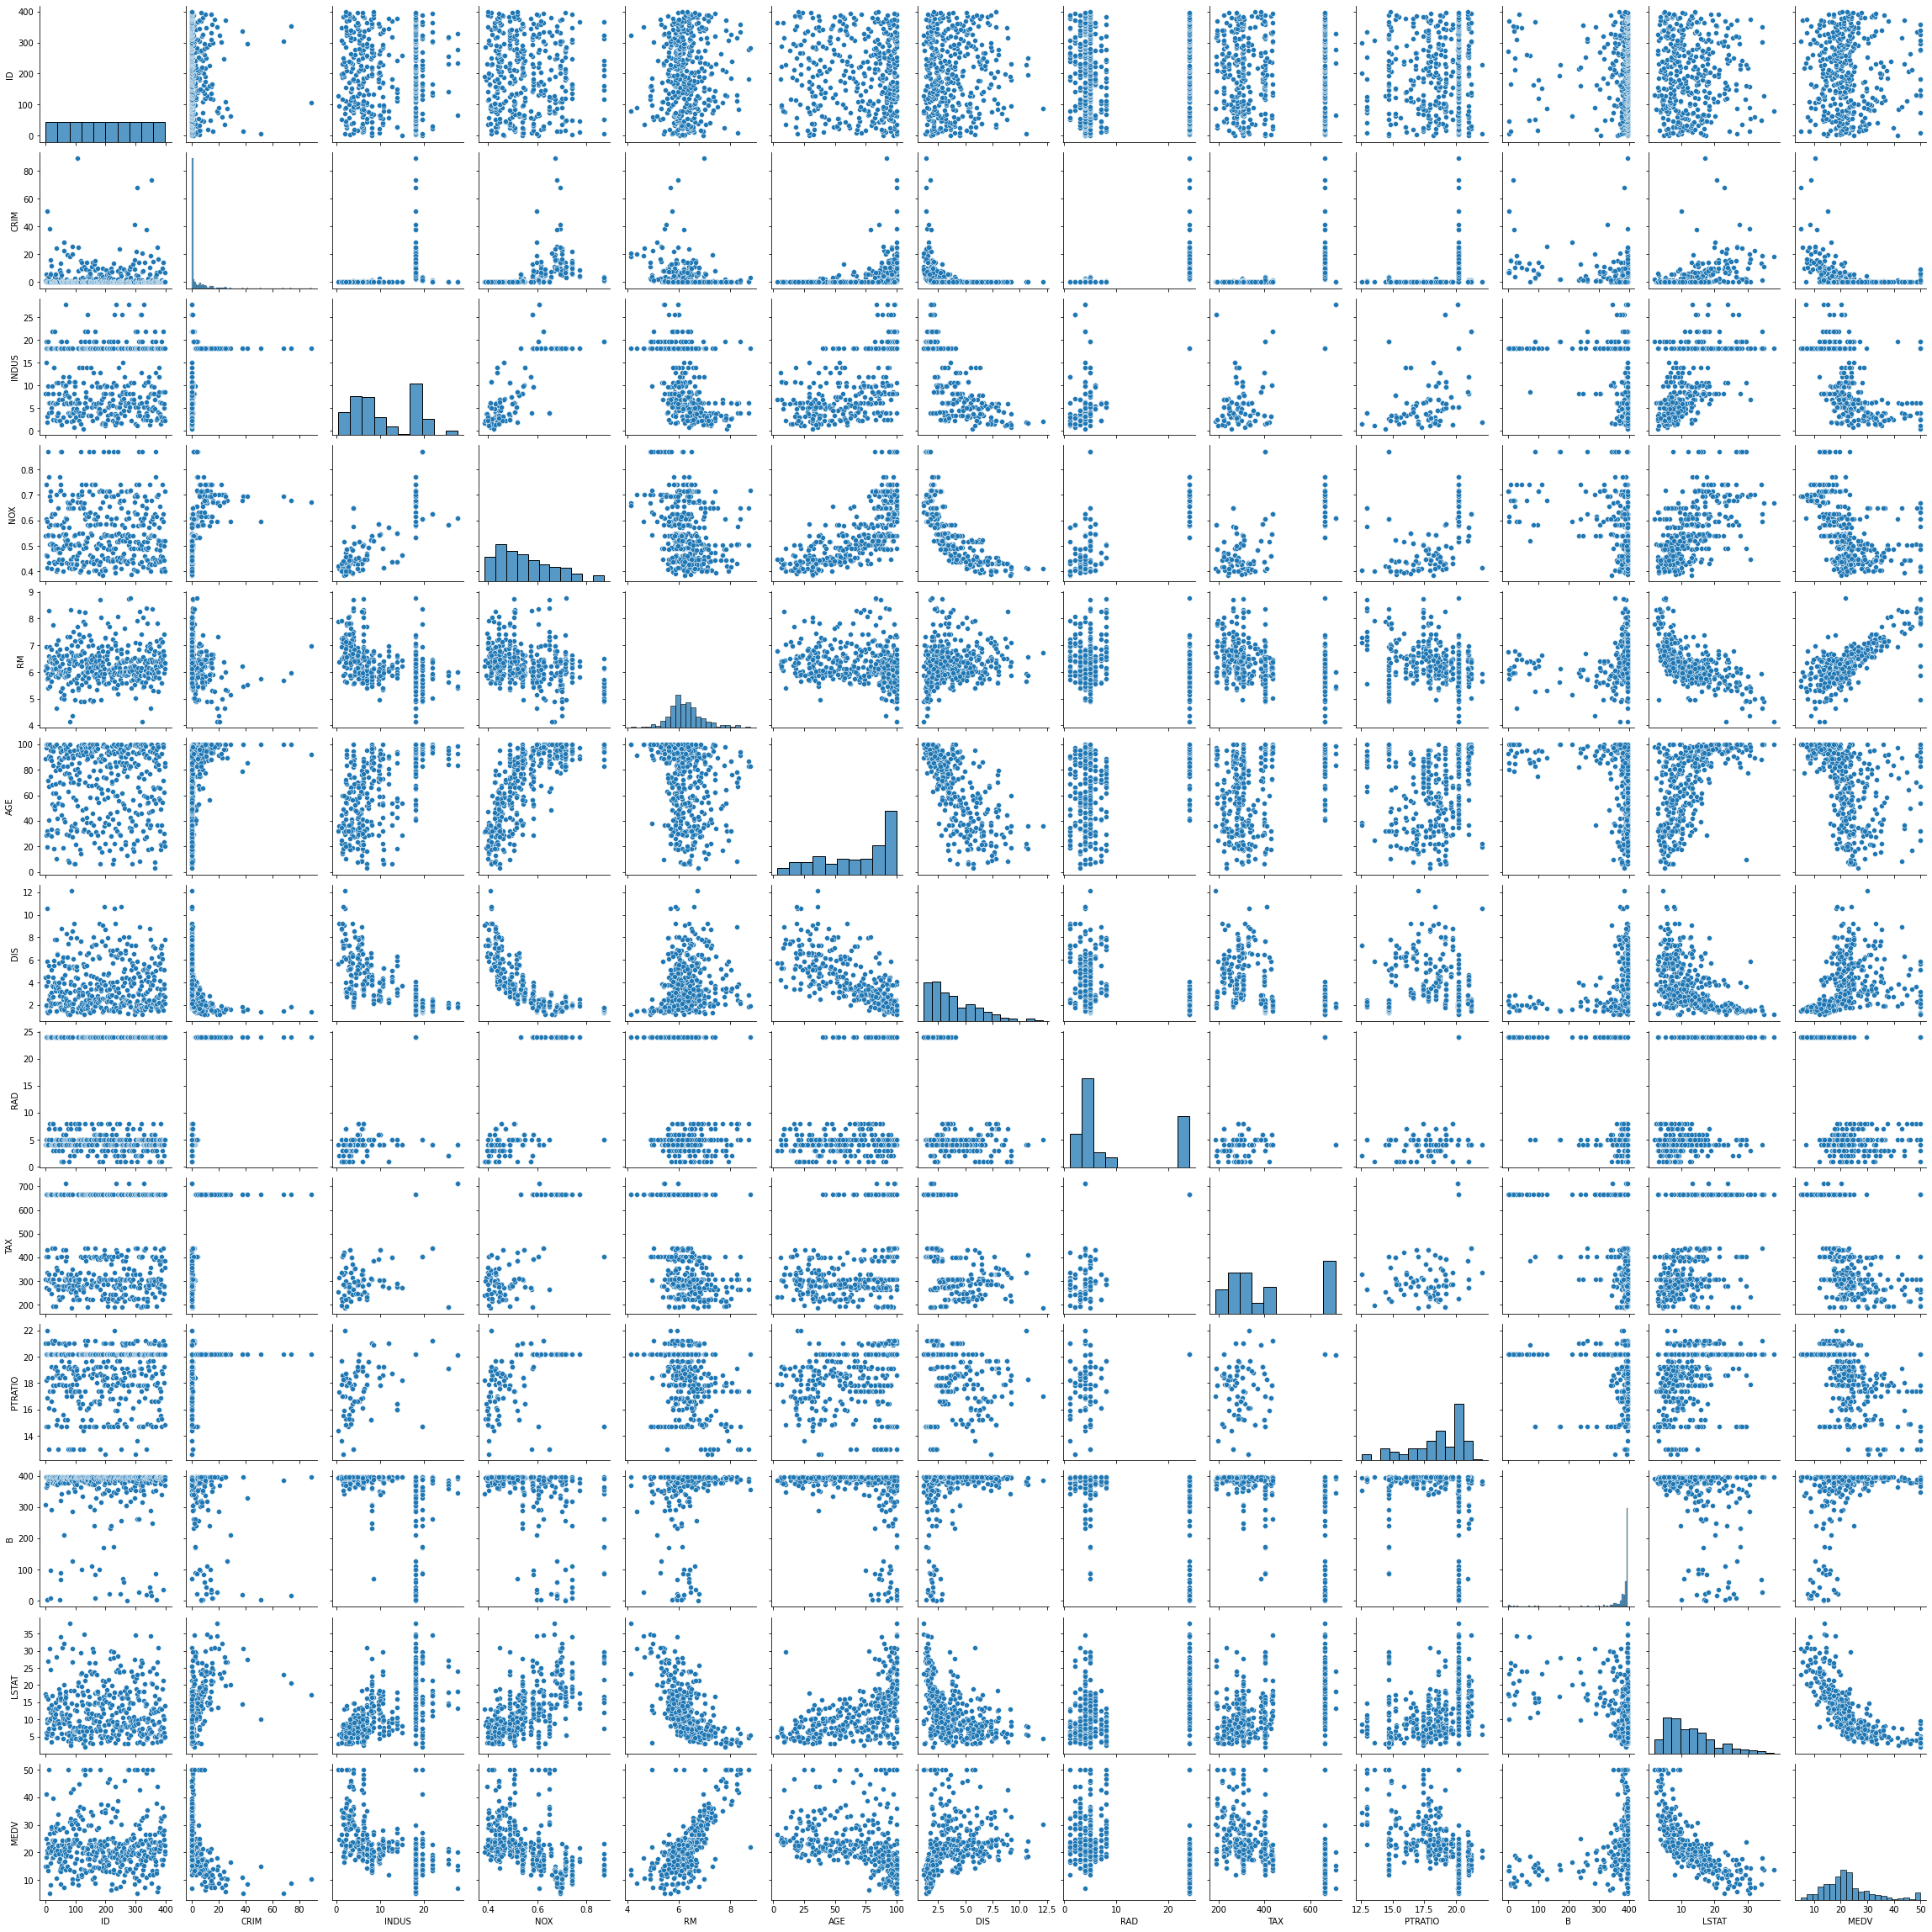

In [19]:
sns.pairplot(Training_data)

/Users/jijujoseph/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

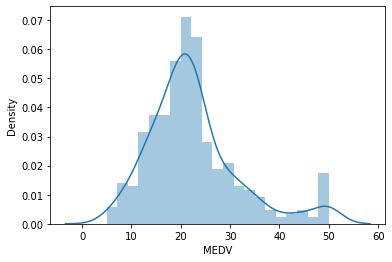

In [20]:
sns.distplot(Training_data["MEDV"])

In [21]:
#negative values show negative correlation
Training_data.corr()

,ID,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
ID,1.000000,-0.009895,0.005167,-0.034631,0.061728,-0.031016,0.010385,-0.031669,-0.007460,0.056734,-0.030764,-0.019382,0.006956
CRIM,-0.009895,1.000000,0.409972,0.422635,-0.205928,0.353379,-0.376323,0.618538,0.577501,0.284967,-0.357581,0.442743,-0.393693
INDUS,0.005167,0.409972,1.000000,0.759132,-0.396865,0.631742,-0.695199,0.608088,0.731619,0.370383,-0.338007,0.624374,-0.502898
NOX,-0.034631,0.422635,0.759132,1.000000,-0.283907,0.736349,-0.768775,0.602960,0.657875,0.154693,-0.382202,0.622209,-0.434271
RM,0.061728,-0.205928,-0.396865,-0.283907,1.000000,-0.198918,0.171596,-0.190030,-0.277064,-0.336408,0.120518,-0.634758,0.721489
AGE,-0.031016,0.353379,0.631742,0.736349,-0.198918,1.000000,-0.750408,0.457339,0.499478,0.234894,-0.274650,0.593788,-0.354106
DIS,0.010385,-0.376323,-0.695199,-0.768775,0.171596,-0.750408,1.000000,-0.492090,-0.520442,-0.185938,0.274036,-0.503383,0.235087
RAD,-0.031669,0.618538,0.608088,0.602960,-0.190030,0.457339,-0.492090,1.000000,0.911103,0.458930,-0.395845,0.503532,-0.386922
TAX,-0.007460,0.577501,0.731619,0.657875,-0.277064,0.499478,-0.520442,0.911103,1.000000,0.450978,-0.400353,0.552239,-0.479308
PTRATIO,0.056734,0.284967,0.370383,0.154693,-0.336408,0.234894,-0.185938,0.458930,0.450978,1.000000,-0.155939,0.352839,-0.495904


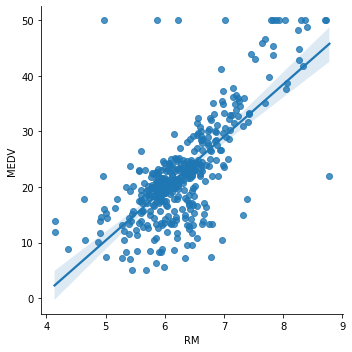

In [22]:
sns.lmplot(x='RM',y='MEDV',data=Training_data);

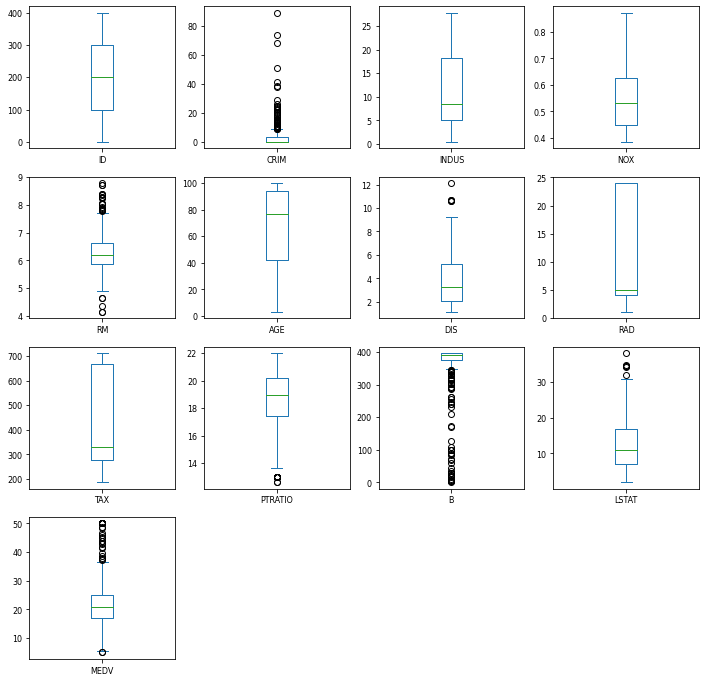

In [23]:
#Checking for outliers:
Training_data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12));

/Users/jijujoseph/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

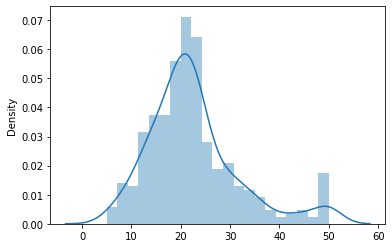

In [24]:
#Target plot
sns.distplot(Y)

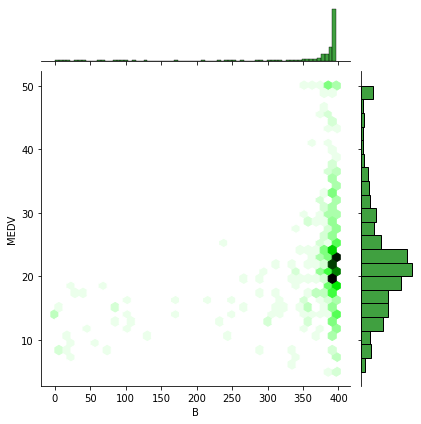

In [25]:
sns.jointplot(x="B",y='MEDV',data=Training_data,kind='hex',color='g')

In [26]:
Training_data=Training_data.drop(["MEDV"],axis=1)


In [27]:
X=Training_data
X.shape

(400, 12)

In [36]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
model.fit(X,Out)

SGDRegressor(eta0=0.1, penalty=None)

In [37]:
model.intercept_

array([4.45938542e+11])

In [38]:
model.coef_

array([ 2.37395575e+12,  9.62237806e+11, -1.42981304e+12,  3.33923812e+11,
        1.31731510e+12, -2.55666095e+12,  1.19429318e+11,  1.66087736e+12,
       -7.45333673e+11,  5.01654050e+12,  1.23160295e+10,  1.03803385e+13])

In [39]:
x=Test_data
X.shape

(400, 12)

In [40]:
Test_data=Test_data.drop(['ZN',"CHAS"],axis=1)

KeyError: "['ZN', 'CHAS'] not found in axis"

In [41]:
Test_data.shape

(105, 12)

In [42]:
y=model.predict(Test_data)

In [43]:
Training_data.shape

(400, 12)

In [46]:
from sklearn.metrics import mean_absolute_error,r2_score
mean_absolute_error(Out[:105],y)

154639877955588.94

In [47]:
r2_score(Out[:105],y)

-5.991586470694999e+26

In [51]:
import numpy as np

# Import phi from train data set
phi = np.loadtxt('train.csv', dtype='float', delimiter=',', skiprows=1,
                 usecols=tuple(range(1, 14)))



In [ ]:
# Import y from train data set
y = np.loadtxt('train.csv', dtype='float', delimiter=',', skiprows=1,
               usecols=14, ndmin=2)



In [ ]:
# Import phi_test from test data set
phi_test = np.loadtxt('test.csv', dtype='float', delimiter=',',
                      skiprows=1, usecols=tuple(range(1, 14)))




In [ ]:
# Add a cloloumn of 1s to right of phi and phi_test
phi_test = np.concatenate((phi_test, np.ones((105, 1))), axis=1)
phi = np.concatenate((phi, np.ones((400, 1))), axis=1)



In [ ]:
# Min Max scaling for phi and phi_test (Feature Engineering)
for i in range(0, 13):
    col_max = max(phi[:, i])
    col_min = min(phi[:, i])
    phi[:, i] = (phi[:, i] - col_min) / (col_max - col_min)
    phi_test[:, i] = (phi_test[:, i] - col_min) / (col_max - col_min)



In [ ]:
# Log scaling on y
y = np.log(y)




In [ ]:
# Function to calculate change in error function
def delta_w(p, phi, w):
    if p == 2:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)))
    if p < 2 and p > 1:
        deltaw = (2 * (np.dot(np.dot(np.transpose(phi), phi), w) -
                       np.dot(np.transpose(phi), y)) +
                  lambd * p * np.power(np.absolute(w), (p - 1)) * np.sign(w))
    return deltaw




In [ ]:
# Dictionary containing filenames as keys and p as values
filenames = {'output.csv': 2.0,
             'output_p1.csv': 1.75,
             'output_p2.csv': 1.5,
             'output_p3.csv': 1.3
             }

# For each item in this dictionary
for (fname, p) in filenames.items():
    # Set initial w to zeros
    w = np.zeros((14, 1))

    # Hyperparameter lambda value
    lambd = 0.2

    # Maximum step size
    t = 0.00012

    # Calculate new value of w
    w_new = w - t * delta_w(p, phi, w)

    i = 0
    # Repeat steps until error between consecutive w is less than threshold
    while(np.linalg.norm(w_new-w) > 10 ** -10):
        w = w_new
        w_new = w - t * delta_w(p, phi, w)
        i = i + 1

    # Load values of id
    id_test = np.loadtxt('test.csv', dtype='int', delimiter=',',
                         skiprows=1, usecols=0, ndmin=2)

    # Calculate y for test data
    y_test = np.exp(np.dot(phi_test, w_new))

    # Save the ids and y
    np.savetxt(fname, np.concatenate((id_test, y_test), axis=1),
               delimiter=',', fmt=['%d', '%f'], header='ID,MEDV', comments='')